<a href="https://colab.research.google.com/github/Bosy-Ayman/Basic-Search-Engine/blob/main/Search_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#install the Pyterrier framework
!pip install python-terrier
# install the nltk modules
!pip install nltk

In [33]:
#install FLAIR
!pip install flair

In [34]:
#we need to install allennlp in order to be able to use elmo model
!pip install allennlp==0.9.0

  Using cached allennlp-0.9.0-py3-none-any.whl (7.6 MB)
  Using cached overrides-7.7.0-py3-none-any.whl (17 kB)
  Using cached spacy-2.1.9.tar.gz (30.7 MB)
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve

In [35]:
import pyterrier as pt
if not pt.started():
  pt.init(boot_packages=["com.github.terrierteam:terrier-prf:-SNAPSHOT"])


In [36]:
#Import the necessary modules:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import *
from nltk.stem.porter import *
import pandas as pd
import re # used to clean the data
#to display the full text on the notebook without truncation
pd.set_option('display.max_colwidth', 150)

In [37]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Data** **collection**
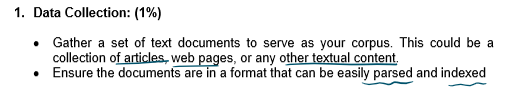

In [38]:
df = pd.read_csv('corona.csv')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #cor...",Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns...",Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco O...,Neutral


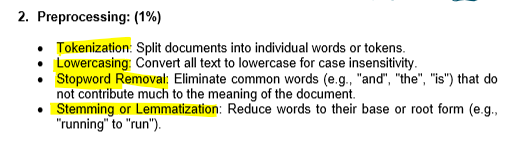

In [39]:
# Initialize Porter stemmer
stemmer = PorterStemmer()

In [40]:
def Stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # print (tokens)
    return ' '.join(stemmed_tokens)

def clean(text):
   text = re.sub(r"[\.\,\#_\|\:\?\?\/\=\@]", " ", text) # remove special characters
   text = re.sub(r'\t', ' ', text) # remove tabs
   text = re.sub(r'\n', ' ', text) # remove line jump
   text = re.sub(r"\s+", " ", text) # remove extra white space
   text = text.strip()
   return text

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words] #Lower is used to normalize al the words make them in lower case
    # print('Tokens are:',tokens,'\n')
    return ' '.join(filtered_tokens)

#we need to process the query also as we did for documents
def preprocess(sentence):
  sentence = clean(sentence)
  sentence = remove_stopwords(sentence)
  sentence = Stem_text(sentence)
  return sentence

In [41]:
res = df['OriginalTweet'].apply(preprocess)
res

0       trend new yorker encount empti supermarket shelv ( pictur wegman brooklyn ) sold-out onlin grocer ( foodkick maxdeliveri ) coronavirus-fear shoppe...
1                          could n't find hand sanit fred meyer turn amazon $ 114 97 2 pack purel ! ! check coronaviru concern drive price http co ygbipbflmi
2                                                                                                                            find protect love one coronaviru
3       panic buy hit newyork citi anxiou shopper stock food & amp ; medic suppli healthcar worker 30 becom bigappl 1st confirm coronaviru patient bloombe...
4       toiletpap dunnypap coronaviru coronavirusaustralia coronavirusupd covid 19 9new corvid19 7newsmelb dunnypaperg costco one week everyon buy babi mi...
                                                                                ...                                                                          
3793                                                

# Indexing
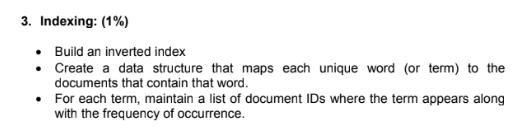

In [42]:
# Import the RM3 class from PyTerrier
from pyterrier.rewrite import RM3


In [43]:
!git clone https://github.com/terrierteam/terrier-prf/
!apt-get install maven
%cd /content/terrier-prf/
!mvn install
!pwd
%cd ..

fatal: destination path 'terrier-prf' already exists and is not an empty directory.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
maven is already the newest version (3.6.3-5).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/content/terrier-prf
[INFO] Scanning for projects...
[INFO] 
[INFO] ----------------------< org.terrier:terrier-prf >-----------------------
[INFO] Building terrier-prf 0.2-SNAPSHOT
[INFO] --------------------------------[ jar ]---------------------------------
[INFO] 
[INFO] --- maven-resources-plugin:2.6:resources (default-resources) @ terrier-prf ---
[INFO] Using 'UTF-8' encoding to copy filtered resources.
[INFO] skip non existing resourceDirectory /content/terrier-prf/src/main/resources
[INFO] 
[INFO] --- maven-compiler-plugin:3.1:compile (default-compile) @ terrier-prf ---
[INFO] Nothing to compile - all classes are up to date
[INFO] 
[INFO] --- maven-resources-plugin:2.6:testResources (defaul

In [45]:
df['docno'] = df["ScreenName"].astype(str)
pd_indexer = pt.DFIndexer("./pd_index")
indexref = pd_indexer.index(df["OriginalTweet"], df["docno"])

In [46]:
index = pt.IndexFactory.of(indexref)

In [47]:
word_to_documents = {}

inv = index.getInvertedIndex()
meta = index.getMetaIndex()

for kv in index.getLexicon():
    term = kv.getKey()
    pointer = index.getLexicon()[term]
    doc_ids = {}
    for posting in inv.getPostings(pointer):
        docno = meta.getItem("docno", posting.getId())
        if docno in doc_ids:
            doc_ids[docno] += 1
        else:
            doc_ids[docno] = 1

    word_to_documents[term] = doc_ids

for term, doc_freqs in word_to_documents.items():
    print("%s -> %s" % (term, doc_freqs))


Streaming output truncated to the last 5000 lines.
live -> {'44961': 1, '44972': 1, '44988': 1, '45073': 1, '45102': 1, '45127': 1, '45152': 1, '45161': 1, '45180': 1, '45209': 1, '45224': 1, '45311': 1, '45319': 1, '45394': 1, '45403': 1, '45519': 1, '45525': 1, '45641': 1, '45642': 1, '45648': 1, '45657': 1, '45670': 1, '45681': 1, '45703': 1, '45727': 1, '45737': 1, '45741': 1, '45760': 1, '45784': 1, '45802': 1, '45805': 1, '45899': 1, '45939': 1, '45955': 1, '46138': 1, '46152': 1, '46207': 1, '46247': 1, '46257': 1, '46379': 1, '46424': 1, '46442': 1, '46449': 1, '46515': 1, '46541': 1, '46574': 1, '46576': 1, '46687': 1, '46692': 1, '46716': 1, '46835': 1, '46913': 1, '46933': 1, '46953': 1, '46957': 1, '46976': 1, '46979': 1, '47011': 1, '47071': 1, '47135': 1, '47160': 1, '47169': 1, '47179': 1, '47193': 1, '47218': 1, '47257': 1, '47308': 1, '47311': 1, '47372': 1, '47437': 1, '47471': 1, '47560': 1, '47584': 1, '47706': 1, '47729': 1, '47785': 1, '47828': 1, '47830': 1, '478

# Query Processing
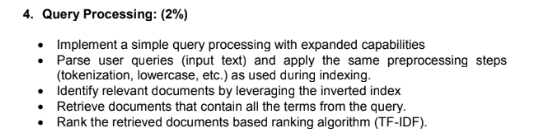

In [48]:
retr = pt.BatchRetrieve(index, controls = {"wmodel": "TF_IDF"})

retr.setControl("wmodel", "TF_IDF")
retr.setControls({"wmodel": "TF_IDF"})

In [49]:
query = "news"

In [50]:
query_processed = preprocess(query)

In [51]:
top_relevant = retr.search(query_processed)
top_relevant

,qid,docid,docno,rank,score,query
0,1,3668,48621,0,3.846565,news
1,1,1744,46697,1,3.764830,news
2,1,620,45573,2,3.751160,news
3,1,1610,46563,3,3.542579,news
4,1,3283,48236,4,3.542579,news
...,...,...,...,...,...,...
140,1,1007,45960,140,2.023568,news
141,1,27,44980,141,1.991934,news
142,1,2481,47434,142,1.961274,news
143,1,3032,47985,143,1.961274,news


In [52]:
import pandas as pd
import pyterrier as pt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import os
pd.set_option('display.max_colwidth', 150)

# Query Expansion
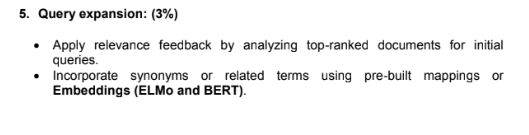

In [53]:
# "rewrite" function from PyTerrier will be used to expand queries specifying RM3 as the model
# fb_docs ==> no. expansion documents
# fb_terms ==> no. expansion terms

rm3_expander = pt.rewrite.RM3(index,fb_terms=10, fb_docs=10)

rm3_qe = top_relevant >> rm3_expander
expanded_query = rm3_qe.search(query).iloc[0]["query"]

expanded_query

<ipython-input-53-5d3045f7207e>:7: DeprecationWarning: Coercion of a dataframe into a transformer is deprecated; use a pt.Transformer.from_df() instead
  rm3_qe = top_relevant >> rm3_expander


'applypipeline:off diet^0.022654090 new^0.785868526 time^0.017619848 realdonaldtrump^0.022654090 record^0.031715728 great^0.022654090 aisl^0.017619848 york^0.033905622 don^0.022654090 wonder^0.022654090'

In [54]:
# Just print the expanded query with term scores
for s in expanded_query.split()[1:]:
  print(s)

print("\n" + query)

diet^0.022654090
new^0.785868526
time^0.017619848
realdonaldtrump^0.022654090
record^0.031715728
great^0.022654090
aisl^0.017619848
york^0.033905622
don^0.022654090
wonder^0.022654090

news


In [59]:
from flair.data import Sentence
from flair.embeddings import WordEmbeddings

# initialize embedding by specifying which model we want to use
glove_embedding = WordEmbeddings('glove')
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

#load the ELMo model
elmo = hub.load("https://tfhub.dev/google/elmo/3")


In [74]:
from flair.data import Sentence
results_list = top_relevant.to_dict('records')

original_tweets = df[df["docno"].isin([result["docno"] for result in results_list])]["OriginalTweet"].tolist()

    # Combine the results and original tweets
for i, result in enumerate(results_list):
  result["original_tweet"] = original_tweets[i]

# Assuming result["original_tweet"] contains the text of the tweet
glove_sentence = Sentence(result["original_tweet"])

# Accessing tokens
print(glove_sentence)
print(glove_sentence.tokens)

# Accessing the first token
print(glove_sentence[0])


Sentence[46]: "@calebmealer @thebradfordfile @realDonaldTrump Very true. China has done a great job. Of more than 80,000 people infected in China, over 67,000 have recovered according to data compiled by Johns Hopkins University. There were 40 new confirmed cases of cor"
[Token[0]: "@", Token[1]: "calebmealer", Token[2]: "@", Token[3]: "thebradfordfile", Token[4]: "@", Token[5]: "realDonaldTrump", Token[6]: "Very", Token[7]: "true", Token[8]: ".", Token[9]: "China", Token[10]: "has", Token[11]: "done", Token[12]: "a", Token[13]: "great", Token[14]: "job", Token[15]: ".", Token[16]: "Of", Token[17]: "more", Token[18]: "than", Token[19]: "80,000", Token[20]: "people", Token[21]: "infected", Token[22]: "in", Token[23]: "China", Token[24]: ",", Token[25]: "over", Token[26]: "67,000", Token[27]: "have", Token[28]: "recovered", Token[29]: "according", Token[30]: "to", Token[31]: "data", Token[32]: "compiled", Token[33]: "by", Token[34]: "Johns", Token[35]: "Hopkins", Token[36]: "University",

In [78]:
# Convert results to a list of dictionaries
results_list = top_relevant.to_dict('records')

# Get original tweets associated with the results
original_tweets = df[df["docno"].isin([result["docno"] for result in results_list])]["OriginalTweet"].tolist()

def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

# Combine the results and original tweets
for i, result in enumerate(results_list):
    result["original_tweet"] = original_tweets[i]

    # Create a Sentence object for the original tweet
    glove_sentence = Sentence(result["original_tweet"])

    # Generate ELMo embeddings for the sentence
    embeddings = elmo.signatures["default"](tf.constant([result["original_tweet"], query]))

    # Access the ELMo embeddings tensor
    elmo_embeddings = embeddings["elmo"]

    # Access the numpy array of the first token (assuming it's a single token sentence)
    original_tweet_embedding = elmo_embeddings.numpy()[0]

    # Assuming the query embedding is the second element in the array
    query_embedding = elmo_embeddings.numpy()[1]

    # Calculate cosine similarity between the query and original tweet embeddings
    similarity_score = cosine_similarity(query_embedding, original_tweet_embedding)
    print("Cosine similarity between query and original tweet {}: {}".format(i+1, similarity_score))


ValueError: shapes (23,1024) and (23,1024) not aligned: 1024 (dim 1) != 23 (dim 0)

# User interface
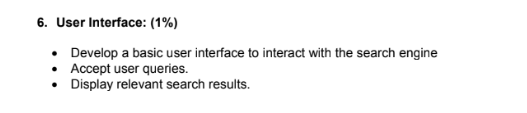

# Evaluation
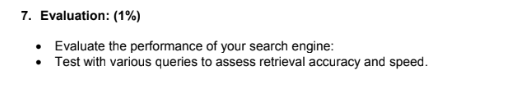

In [ ]:
vaswani_dataset = pt.datasets.get_dataset("BeIR/scidocs-qrels")
topics = vaswani_dataset.get_topics()
topics.head(5)
qrels = vaswani_dataset.get_qrels()

In [ ]:
retr = pt.BatchRetrieve(index, controls = {"wmodel": "TF_IDF"})

retr.setControl("wmodel", "TF_IDF")
retr.setControls({"wmodel": "TF_IDF"})

res=retr.transform(topics)

In [ ]:
res

In [ ]:
retr.search("Light")


In [ ]:
eval = pt.Evaluate(res,qrels)
eval

In [ ]:
eval = pt.Evaluate(res,qrels,metrics=["map","recall","P"], perquery=True)
eval